# Final Project for Statistics for Data Science with Python Course
### Developed by J.N.Gabra on 01/28/2022

In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

# Import Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st


# Load Data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

## Data Definitions
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
#  LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Generating Descriptive Statistics and Visualizations
### "Median value of owner-occupied homes" as a boxplot

<AxesSubplot:ylabel='MEDV'>

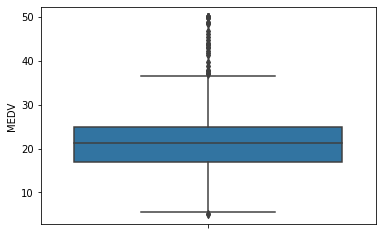

In [2]:
sns.boxplot(y="MEDV",data=boston_df)

### Histogram for the Charles river variable

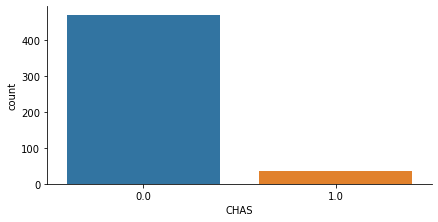

In [3]:
sns.catplot(x='CHAS',kind='count', data=boston_df,height = 3, aspect = 2)
#plt.hist(boston_df['CHAS'])

 ### Boxplot for the MEDV variable vs the AGE variable. 
 #### (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot:xlabel='MEDV', ylabel='age_bin'>

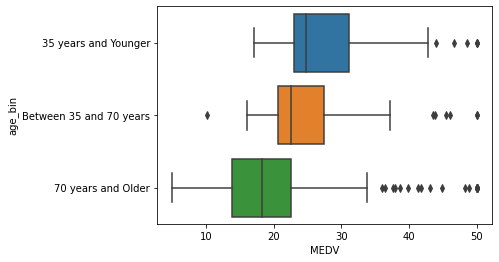

In [4]:
boston_df['age_bin']=pd.cut(x=boston_df['AGE'], bins=[0,35,70,999],labels=["35 years and Younger","Between 35 and 70 years","70 years and Older"])
sns.boxplot(x='MEDV',y="age_bin",data=boston_df)

 ### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

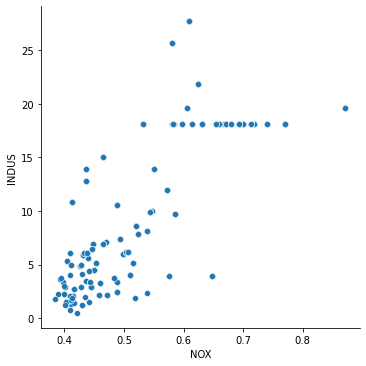

In [5]:
sns.relplot(x="NOX",y="INDUS",data=boston_df)

We can see from above that there seems to be a positive relationship and correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. Essentially, as one increases so does the other.

### Histogram for the pupil to teacher ratio variable

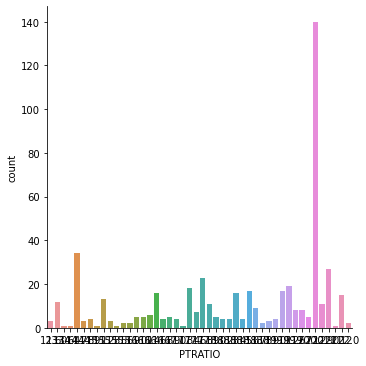

In [6]:
sns.catplot(x='PTRATIO',kind='count', data=boston_df)

## Use the appropriate tests to answer the questions provided.
### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
For this, we hypothesize that there is no difference in median value of houses bounded by the Charles river or not with the alternative hypothesis that there is a difference. We will use an alpha level of 0.05.

In [7]:
X = boston_df['CHAS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           7.39e-05
Time:                        19:49:38   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the results above, we see that we can reject the null hypothesis and accept the alternative hypothesis that there is a difference in the median value of houses bounded by the Charles river or not. Specifically, we see that having a home by the Charles river increases the median value of the home by 6.3462 which is in units of $1000s meaning a home by the river has a median value of $6356.2 higher than those that do not.

### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
For this, we hypothesize that there is no difference in median value of houses for each proportion of owner occupied units with the alternative hypothesis that there is a difference. We will use an alpha level of 0.05.

In [8]:
from statsmodels.formula.api import ols
boston_df['age_bin']=pd.cut(x=boston_df['AGE'], bins=[0,35,70,999],labels=["35 years and Younger","Between 35 and 70 years","70 years and Older"])
lm = ols('MEDV ~ age_bin', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)


             df        sum_sq      mean_sq         F        PR(>F)
age_bin     2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual  503.0  37314.563532    74.184023       NaN           NaN


We see that the p-value is < 0.05 and can reject the null hypothesis. We determine that there is a difference in median values of houses for each proportion of owner occupied unites built prior to 1940.

### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
We assume that there is no correlation between the two variables as our null hypothesis.

In [9]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           7.91e-98
Time:                        19:49:38   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can reject the null hypothesis with a p-value < 0.05 and can state that there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
We assume the null hypothesis that there is no relationship between the two variables.

In [10]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        19:49:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We conclude that there is an association between weighted distance to the five Boston employment centers on the median value of owner occupied homes with a p-value < 0.05.